##  **¿Qué tipo de juego es más rentable?**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

## **Indíce**


- [Explicación](#Explicación)
- [Descripción de datos](#Descripción-de-datos)
- [Carga de datos](#Carga-de-datos)
- [Preparación de datos](#Preparación-de-datos)
- [Análisis de datos](#Análisis-de-datos)
- [Perfil de usuario por región](#Perfil-de-usuario-por-región)
- [Comprobación de hipotesís](#Comprobación-de-hipotesís)
- [Conclusión general](#Conclusión-general)

## **Explicación**

Tras observar el mercado de los videojuegos la tienda online Ice ha decidido realizar un estudio para encontrar oportunidades y determinar si un videojego tiene éxito o no, con el fin de vender solo los proyectos prometedores y planificar campañas publicitarias en estos, a través de la información historíca de un año anterior al lanzamiento de un año posterior, como ejemplo podríamos hablas del diciembre del 2016 para lanzar campañas publicitas para principios del 2017.

Guiando el estudio a través de dos posibles Hipótesis que orientan el análisis.

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y Pc son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


## **Descripción de datos**

— *Name* (Nombre)

— *Platform* (Plataforma)

— *Year_of_Release* (Año de lanzamiento)

— *Genre* (Género)

— *NA_sales* (ventas en Norteamérica en millones de dólares estadounidenses)

— *EU_sales* (ventas en Europa en millones de dólares estadounidenses)

— *JP_sales* (ventas en Japón en millones de dólares estadounidenses)

— *Other_sales* (ventas en otros países en millones de dólares estadounidenses)

— *Critic_Score* (máximo de 100)

— *User_Score* (máximo de 10)

— *Clasificación* (ESRB)

## **Carga de datos**

In [2]:
# Dependencias
import pandas as pd 
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:

data_game = pd.read_csv("/datasets/games.csv")



## **Preparación de datos**

Se comprueba la información la información general y los datos nulos que existen

In [4]:
data_game.info()
data_game.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


 Se hace el reeemplazo de los nombre a minusculas para su mejor manipulación , se observan los tipos de datos y se determina que la columna user_score puede manipularse mejor si es de tipo float que object, se comprueba que se haya cambiado el tipo de dato.

 Se eimina la etiqueta tbd y se pone en estado nulo, dado a que estos datos serán procesados de mejor manera en las próximas manipulaciones.

In [5]:

# los valores tbd se convierten a nulos para ser calculados de forma

data_game.columns = data_game.columns.str.lower()
data_game['user_score'] = data_game['user_score'].replace('tbd',None).astype(float)

# se cambia user score por float antes era object para tener mejor control
data_game['user_score'] = data_game['user_score'].astype(float)
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Se observa algunos datos nulos con mayor frecuencia en las columnas year_of_release, rating, critic_score y user_score, se puede suponer que los datos son ausentes dado al año de lanzamiento , obsoliencia frente a las otras plataformas o simplemente el mal manejo de los datos por parte de los programadores.

Se propone primero imputar los datos por orden de relevancia que pueden tener una relación con futuras imputaciones , de esta forma se empieza con la columna year_of_release.

In [6]:

# calcular medias para rellenar datos ausentes , lo haremos por secciones
# primero  los datos de year,rating , luego critic score y terminamos con user score

# se crea una data frame de datos limpios
df_clean = data_game.dropna()
median_year_release =(
    df_clean
    .groupby('platform')['year_of_release']
    .median()
   
    )
#data_game['critic_score'] = data_game.set_index('name')['critic_score'].fillna(median_critic_score).reset_index(drop=True)
data_game['year_of_release'] = data_game.set_index('platform')['year_of_release'].fillna(median_year_release).reset_index(drop=True)
data_game.isnull().sum()

data_game['platform'].drop_duplicates()

data_game.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16694 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


La siguiente columna a imputar es rating, la cual se calcula a partir de la mediana los datos, usando diferentes columnas relacionables como lo es platform, year_of_release y genre , para buscar y rellenar la columnas en relación a las columnas antes nombradas.

In [7]:

# se rellenan los datos de rating
# se crea la funcion para que pueda calcular los valores por diferentes parametros
# en este caso platform, year of release que mantienen una relacion por la vida de las plataformas y por ultimo genre
def fill_rating(data_game,df_clean,group_column):
    median_rating_score = (
        df_clean
        .groupby([group_column])['rating']
        .agg(lambda x: x.mode().iat[0] if not x.mode().empty else None)
        .reset_index()
    )
    for index, row in data_game.iterrows():
        if pd.isna(row['rating']):
            column = row[group_column]
            rating_score = median_rating_score[median_rating_score[group_column] == column]['rating'].values
            if len(rating_score) > 0:
                mode_rating = rating_score[0]
                data_game.at[index,'rating'] = mode_rating

fill_rating(data_game, df_clean, 'platform')
fill_rating(data_game, df_clean, 'year_of_release')
fill_rating(data_game, df_clean, 'genre')




Se rellenan los datos de la columna critic score y se hace la comprobación.

In [8]:
# se imputaran los datos de critic score de acuerdo al nombre y plataforma

data_game['critic_score'] = pd.to_numeric(data_game['critic_score'],errors='coerce')
data_game['critic_score'] = data_game['critic_score'].replace(0,np.nan)




Se rellena la columna user score

In [9]:
data_game['user_score'] = pd.to_numeric(data_game['user_score'],errors='coerce')
data_game['user_score'] = data_game['user_score'].replace(0,np.nan)


Al ser muy pocos los datos nulos restantes , se eliminan a traves de la creación de una copia del df original y se hace la comprobación de los datos para su futura manipulación.

In [10]:

## se borran los demas datos al ser sumamente menores

data_game_play = data_game
data_game_play.isna().sum()
data_game_play.info()
data_game.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16694 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,T
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,M


Se crea una suma total de venta en todas las regiones para cada juego , a fin de enriqucer los datos para corroborar futuras suposiciones.

In [11]:
## sumar los valorees

data_game_play['total_sales'] = data_game_play['na_sales'] + data_game_play['eu_sales'] + data_game_play['jp_sales'] + data_game_play['other_sales']




## **Análisis de datos**


Se empezará con la visualización de los datos relacionados con el lanzamiento de videojuegos por año, para determinar cual es el periodo que tiene mas datos sobre los demás.

<Axes: title={'center': 'Juegos por año'}, xlabel='year_of_release'>

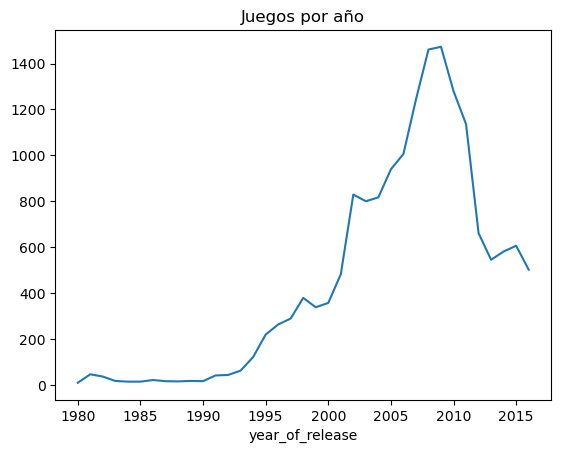

In [12]:
data_game_play.groupby("year_of_release").size().plot(kind="line",title="Juegos por año")



El período que compone entre el 2005 y el 2010 mantienen una cantidad significativa en comparación con los otros años.

Se crea una comparación entre el total de ventas por plataforma para visualizar el impacto que tiene estas en todas las regiones de venta.

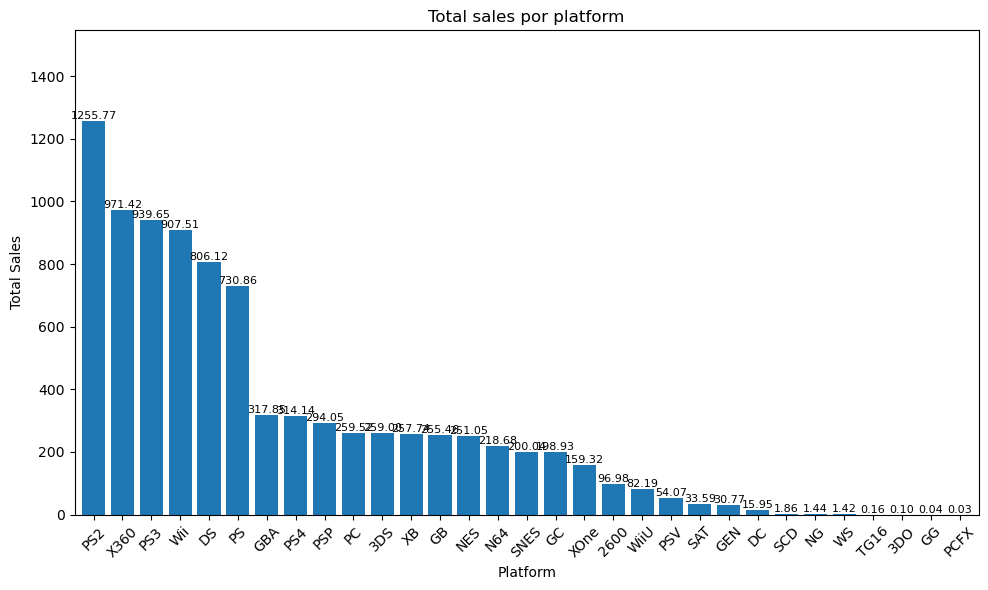

In [13]:


data_game_play.groupby('year_of_release').size().plot(kind='line')
total_sum_platform = (
    data_game_play
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

ax = total_sum_platform.plot(kind='bar', figsize=(10, 6), width=0.8)
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
ax.set_title('Total sales por platform')

# Añadir etiquetas de datos sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Las cinco plataformas que tienen mayor venta hasta el momento es la PS2, X360, PS3, Wii y Ds, las cuales mantienen una diferencia no tal severa en comparación con las demás plataformas.

Se creará una distribución basada en los datos de cada año , para mirar más de cerca las implicaciones de las ventas por plataforma y año por medio de historiograma,

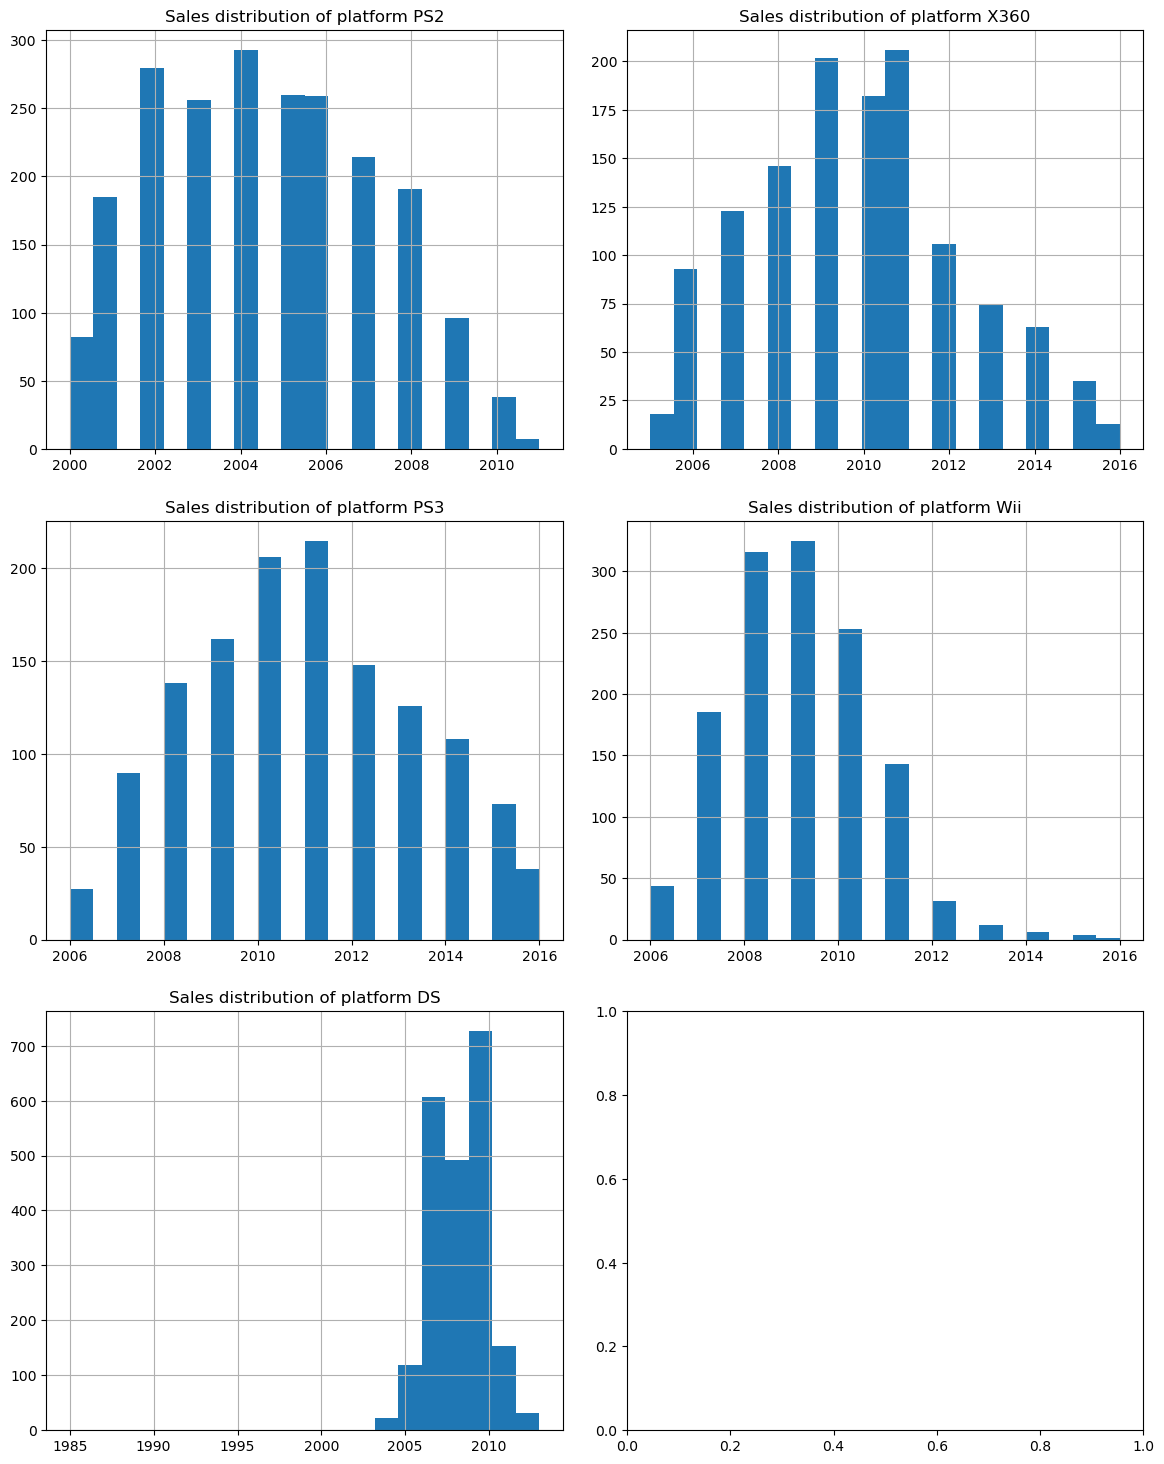

In [14]:

## datos de plataformas populares

most_total_sales_platforms = list(
    data_game_play
    .groupby('platform')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales',ascending=False)
    .head(5)['platform']
)

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 15))

for i, platform in enumerate(most_total_sales_platforms):
  df_tmp = data_game_play.query("platform == @platform")

  ax.flatten()[i].set_title(f"Sales distribution of platform {platform}")
  
  df_tmp["year_of_release"].hist(bins=20, ax=ax.flatten()[i])

fig.tight_layout(pad=2.0)


Aunque existen cinco plataformas con mayores ventas , se puede notar que hay algunas que llegan hasta al 2016 y otras que se detienen en el periodo del 2010, los cuales determinan que no tienen juegos actuales o que los juegos practicamente no se venden, debido a su obsolencia.

Las tres plataformas que continuan con ventas estandarizadamente altas son X360, wii y Ps3,Las ventas del ps2 y el ds son plataformas que fueron populares pero que no mantienen ventas hasta el dia de hoy.

Se determina que los datos que se utilizan para el estudio serán a partir del 2014, dado a que tres de las 5 plataformas que mantienen top de ventas tienen datos a partir de ahí, y también por que existen un conjunto adecuado de plataformas que mantienen el rango de datos útiles, en especial 7.

De esta forma, se agrupan y filtran por plataforma, para determinar la popularidad, ventas y datos relevantes a utilizar.

Se visualizan los resultados.



available years from XB : 8.0
available years from PS2 : 11.0
available years from DS : 28.0
Average time for arise new platform: 3.0
Periodo definido para analisis de tiempo 2013


<Axes: title={'center': 'Platform with important data'}, xlabel='year_of_release'>

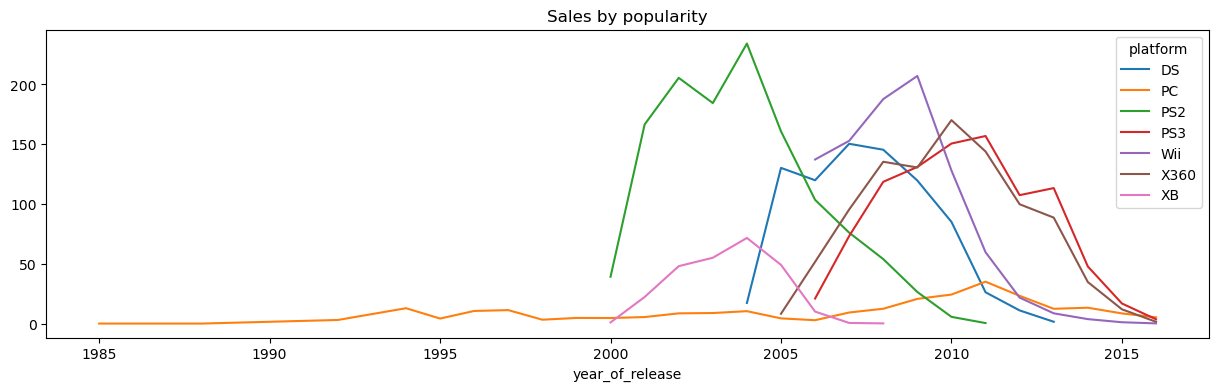

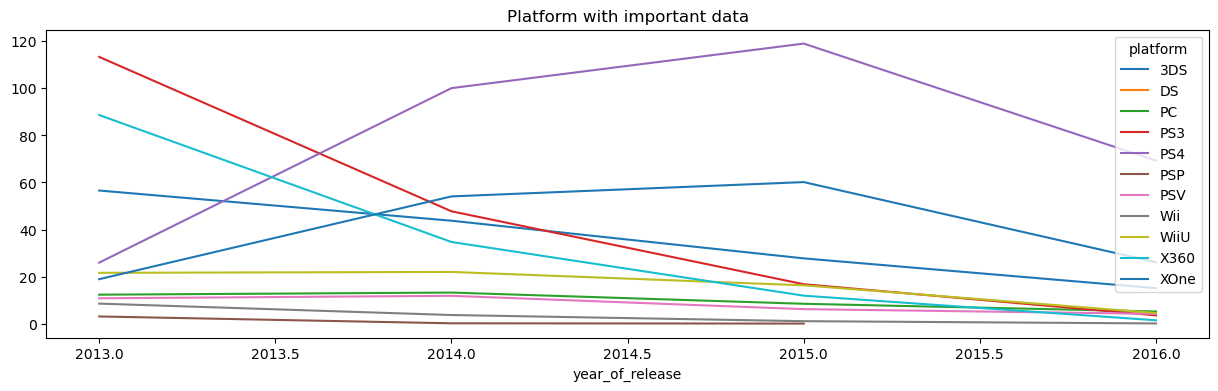

In [15]:
# plataformas populares
most_popular_platform = list(
    data_game_play
    .groupby('platform')['user_score']
    .sum()
    .reset_index()
    .sort_values('user_score',ascending=False)
    .head(7)['platform']
)

#filtracion de datos para extraer datos sobre plataformas populares
sales_by_popular_studio = (
    data_game_play
    .query('platform in @most_popular_platform')
    .pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
)

sales_by_popular_studio.plot(kind='line',figsize=(15,4),title='Sales by popularity')

## fueron populares PS, PS2, DS
## calcular max y min 

past_popular_platform = ['XB','PS2','DS']
for x in past_popular_platform:
    year_from_platform = data_game_play[data_game_play['platform'] == x]['year_of_release'].max() - data_game_play[data_game_play['platform'] == x]['year_of_release'].min()
    print(f'available years from {x} : {year_from_platform}')

## calculate average time for platform
current_platform = ['X360','Wii','PC','PS3',]
year = []
for x in  current_platform:
    years = data_game_play[data_game_play['platform'] == x ]['year_of_release'].astype(int).max() - data_game_play[data_game_play['platform'] == 'DS']['year_of_release'].astype(int).max()
    year.append(years)
     
average_time = np.mean(year)

print(f'Average time for arise new platform: {average_time}')


analizys_period = data_game_play['year_of_release'].max()- average_time

# se define el periodo de tiempo por medio del calculo promedio del surgimiento de una plataforma vs el cierre de otra

print(f'Periodo definido para analisis de tiempo {int(analizys_period)}')



## Determinando datos relevantes Datos relevantes te quedates aqui determinando que datos vamos a cortar de pataforma
## si los datos son lineales los dtos aun son validos para el estudio debido a que todavia interfieren para realizar proyecciones
data_game_play_studio = data_game_play[data_game_play['year_of_release'] >= analizys_period]
data_game_play_studio.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot(kind='line',figsize=(15,4),title='Platform with important data')



Se imprime el tiempo de duración de las plataformas que tuvieron ventas pero que ahora no tienen,
así como el tiempo promedio entre el termino o muerte de una plataforma y el nacimiento de otra para finalizar con la visualización de los datos con las plataformas mas rentables de los años elegidos.

El periodo definido para el estudio es a partir del año 2013 dado a que el promedio entre el surgimiento de una nueva plataforma y el vencimiento de esta es de tres años, determinando que los datos que impactarían en los subsecuentes años son los del 2013 a la fecha.

Realizamos un boxplot para verificar las ventas globales de todos los juegos por plataforma

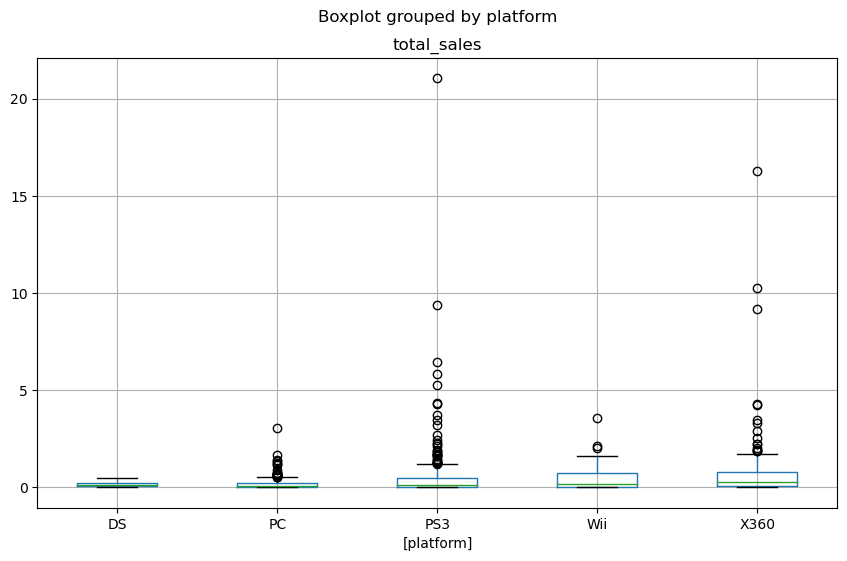

In [16]:
##
filtered_data = (
    data_game_play_studio
    .query("platform in @most_popular_platform ")[["platform", "total_sales"]]
    .boxplot(by="platform", figsize=(10, 6),)
)






La interpretación del boxplot nos dice que existen mayores datos atipícos en PS3 y X360en comparación con la plataforma Wii, así mismo muestra la tendencia que los datos de wii estan mayormente centralizados es decir menos datos en el mismo lugar a comparación de las otras plataformas.

A través de un gráfico de dispersión se visualiza las posibles correlaciones de las variables para determinar si hay relación negativa o positiva de las calificaciones del usuario.

Correlacion entre Reseñas de usuarios y ventas:0.00


,user_score,total_sales
user_score,1.000000,-0.002769
total_sales,-0.002769,1.000000


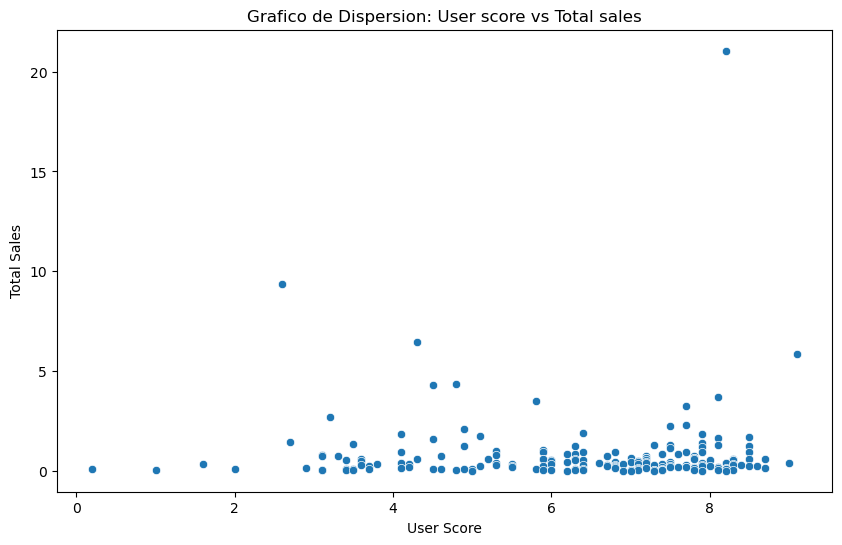

In [17]:

## LA correlacion negativa quiere decir que a medida que los usuarios puntuan mas bajo 
# Los juegos suelen venderse menos

platform_data = data_game_play_studio.query('platform == "PS3"')
plt.figure(figsize=(10,6))
sns.scatterplot(data=platform_data, x='user_score',y='total_sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Grafico de Dispersion: User score vs Total sales')


correlation_user_sales = platform_data['user_score'].corr(platform_data['total_sales'])
print(f"Correlacion entre Reseñas de usuarios y ventas:{correlation_user_sales:.2f}")
data_game_play_studio[['user_score','total_sales']].corr()

Existe una correlación entre las ventas totales de los videojuegos con la puntuación de usuario, es decir, entre menor sea la puntuación de un videojuego menos se vende.

Se agrupan  los videojuegos para determinar cuales son los que tienen mayor presencia en diversas plataformas.

<Axes: title={'center': 'Comparacion de videojuegos que comparten plataformas'}, xlabel='Nombre de los videojuegos', ylabel='Numero de plataformas'>

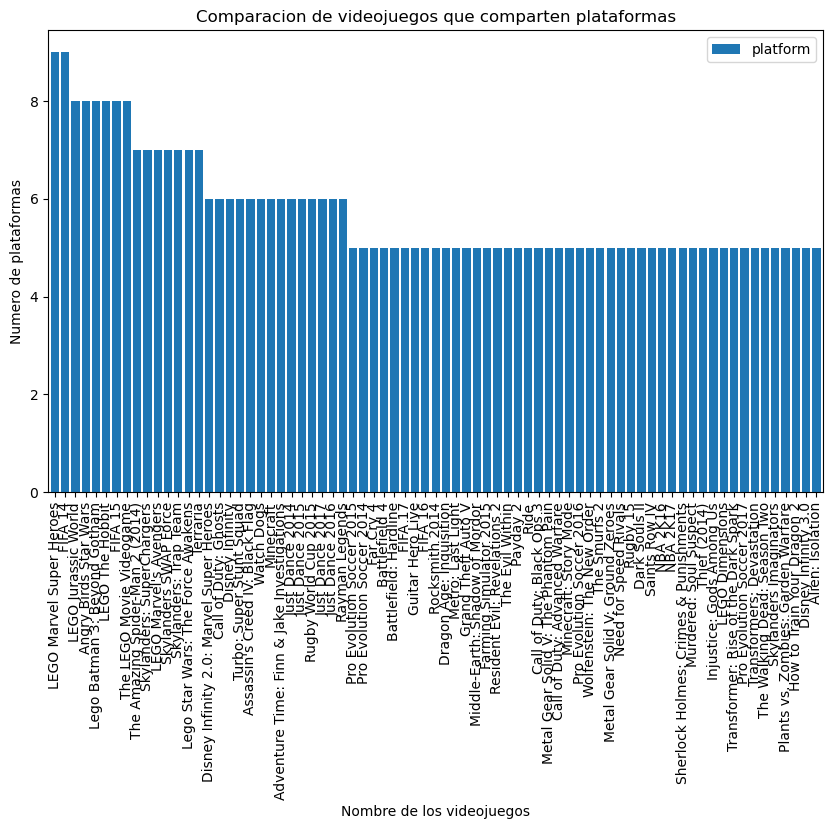

In [18]:
game_comparation = (
   data_game_play_studio
   .query('year_of_release >= 2013')
   .groupby('name')['platform']
   .count()
   .sort_values(ascending=False)
   .reset_index()
   
   .query('platform > 4')
   
)

game_comparation.set_index('name', inplace=True)
game_comparation.plot(
   kind='bar', 
   figsize=(10,6),
   width=0.8,
   title='Comparacion de videojuegos que comparten plataformas',
   xlabel='Nombre de los videojuegos',
   ylabel= 'Numero de plataformas'
   )



Los juegos de lego comparten el máximo numero de comercialización en plataformas ya que se encuentran presentes en 8 plataformas, siendo este un dato importante para una posible inversión futura por parte de Lego.

Se crea una distribución por género y verificar los más rentables.

<Axes: title={'center': 'Comparacion de generos'}, xlabel='Nombre de genre', ylabel='Ventas totales'>

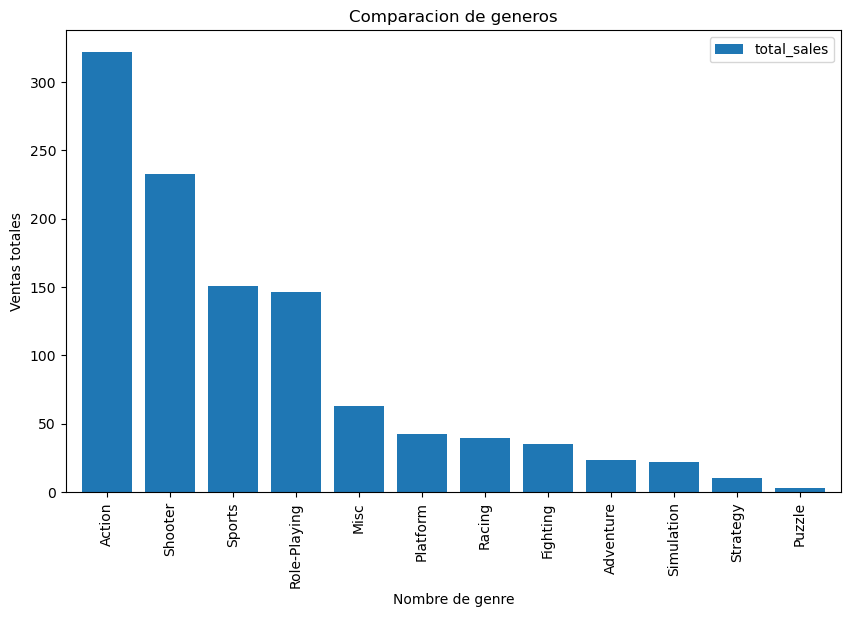

In [19]:
genre_comparation = (
   data_game_play_studio
   .groupby('genre')['total_sales']
   .sum()
   .sort_values(ascending=False)
   .reset_index()
)
genre_comparation.set_index('genre', inplace=True)
genre_comparation.plot(
   kind='bar', 
   figsize=(10,6),
   width=0.8,
   title='Comparacion de generos',
   xlabel='Nombre de genre',
   ylabel= 'Ventas totales'
   )


Los tres géneros mas rentables son los de action, shooter y sports.

## **Perfil de usuario por región**

Se crea una estimacion de plataformas mas rentables por región tomando en cuenta solo las regiones etiquetadas .
NA, UE , JP

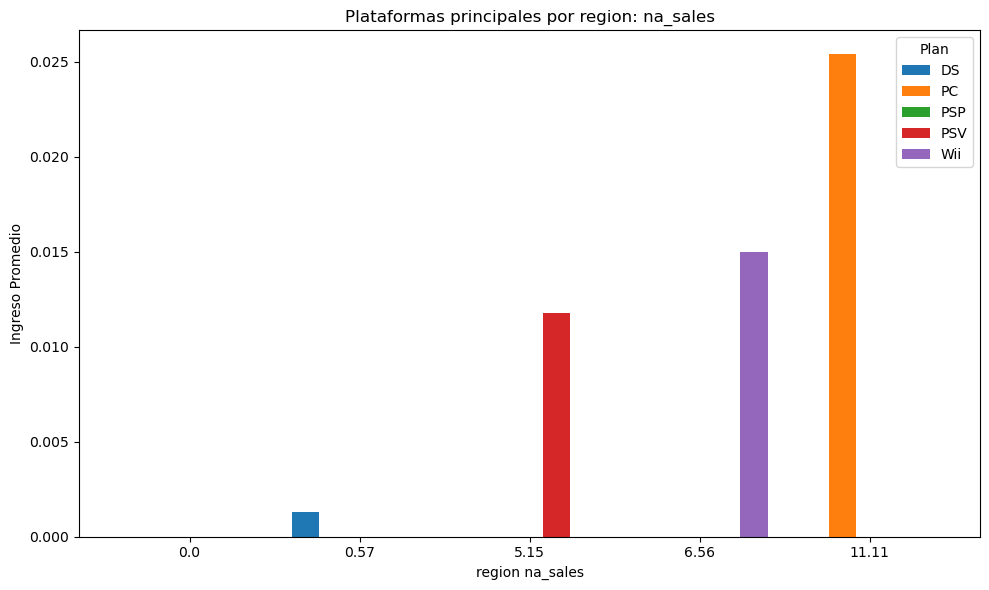

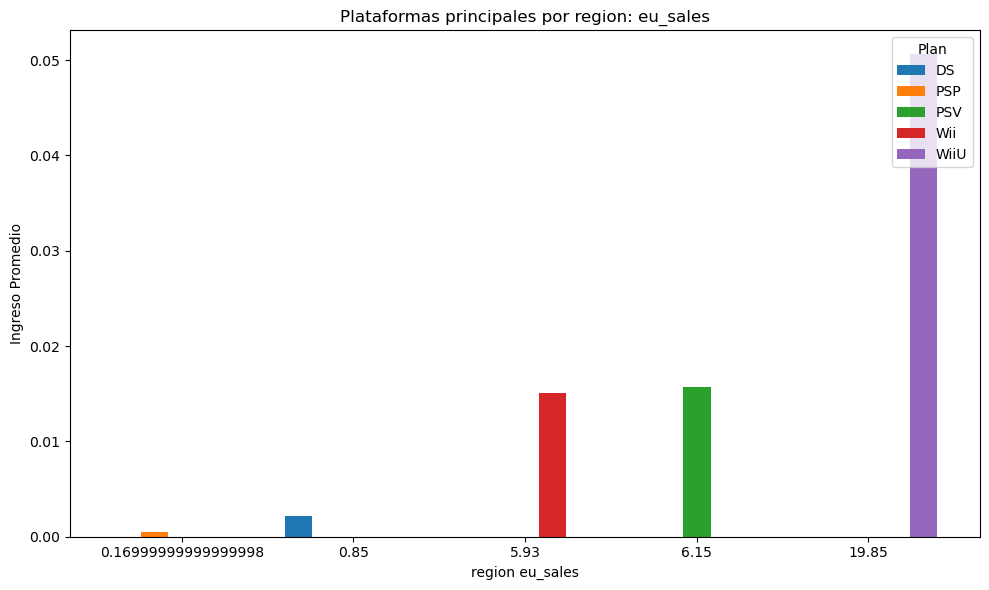

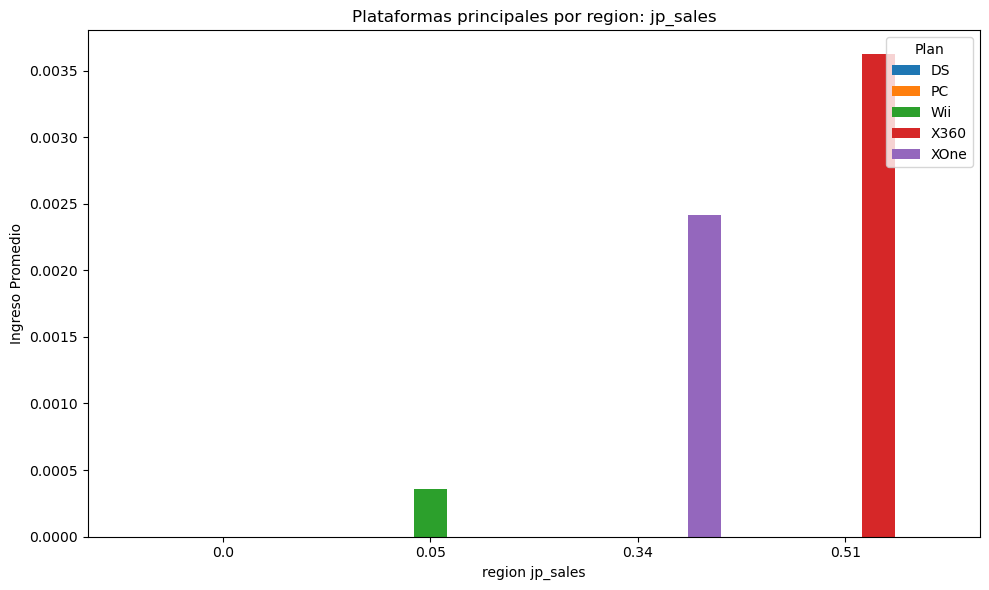

In [20]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    principal_platform = (
        data_game_play_studio
        .groupby('platform')[region]
        .sum()
        .reset_index()
      
    )

    principal_platform['average_sales'] = principal_platform[region] / principal_platform[region].sum()
    
    sales_by_principal_platform =(
        principal_platform
        .sort_values(by=region)
        .head(5)
    )
    
    pivot_table = sales_by_principal_platform.pivot(index=region,columns='platform',values='average_sales')
    ax= pivot_table.plot(kind='bar',figsize=(10,6),width=0.8)
    plt.title(f'Plataformas principales por region: {region}')
    plt.xlabel(f'region {region}')
    plt.ylabel('Ingreso Promedio')
    plt.legend(title='Plan', loc='upper right')
    plt.xticks(rotation=0)
    
    
    plt.tight_layout()
    plt.show()    

    
    

La plataforma con mayor presencia en las regiones es el wii U ya que ocupa el segundo lugar en mas de una visualización.

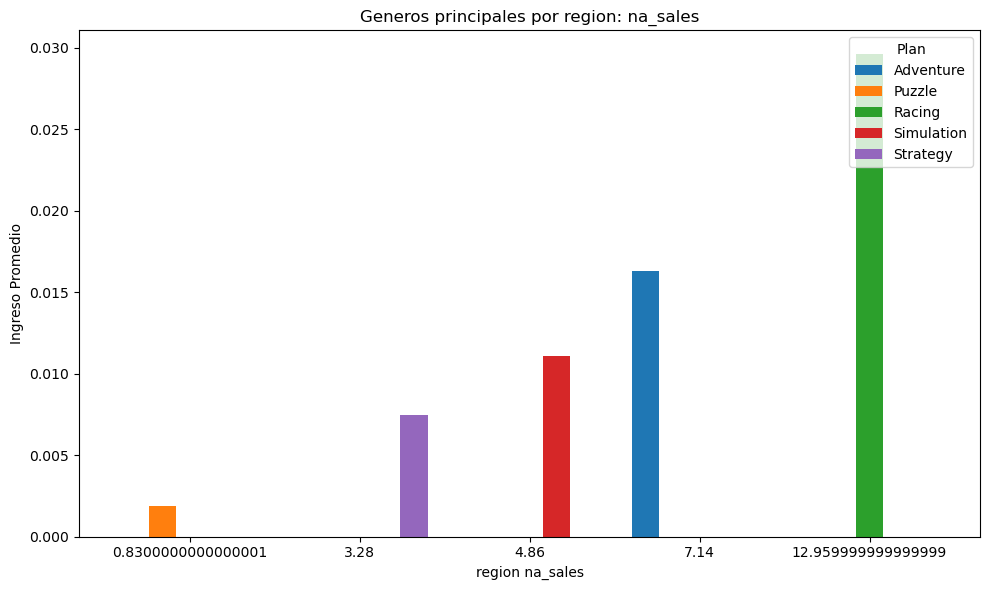

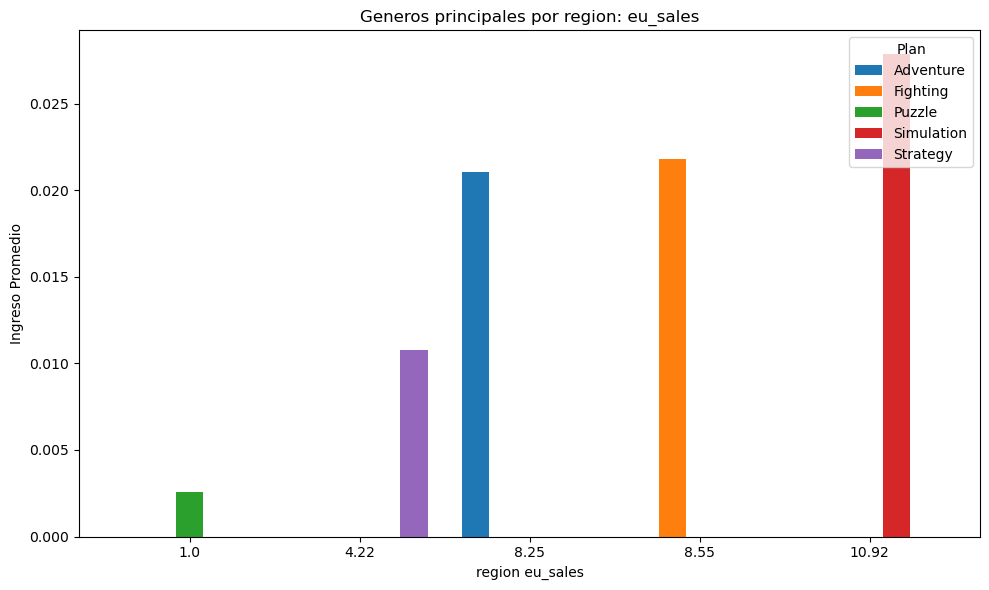

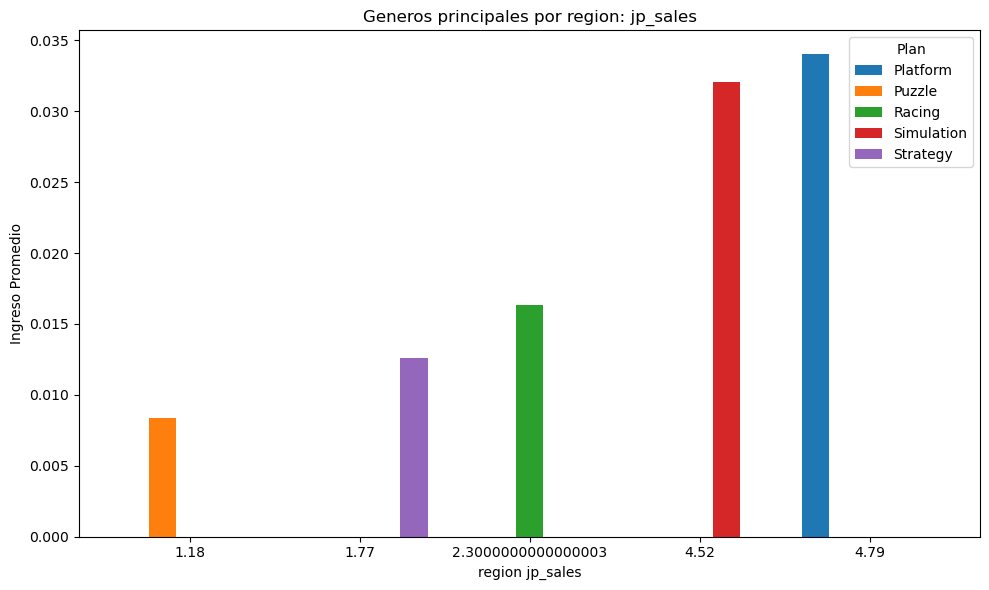

In [24]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    principal_platform = (
        data_game_play_studio
        .groupby('genre')[region]
        .sum()
        .reset_index()
      
    )

    principal_platform['average_sales'] = principal_platform[region] / principal_platform[region].sum()
    
    sales_by_principal_platform =(
        principal_platform
        .sort_values(by=region)
        .head(5)
    )
    
    pivot_table = sales_by_principal_platform.pivot(index=region,columns='genre',values='average_sales')
    ax= pivot_table.plot(kind='bar',figsize=(10,6),width=0.8)
    plt.title(f'Generos principales por region: {region}')
    plt.xlabel(f'region {region}')
    plt.ylabel('Ingreso Promedio')
    plt.legend(title='Plan', loc='upper right')
    plt.xticks(rotation=0)
    
    
    plt.tight_layout()
    plt.show()    


El género con mayor presencial el estilo platform.

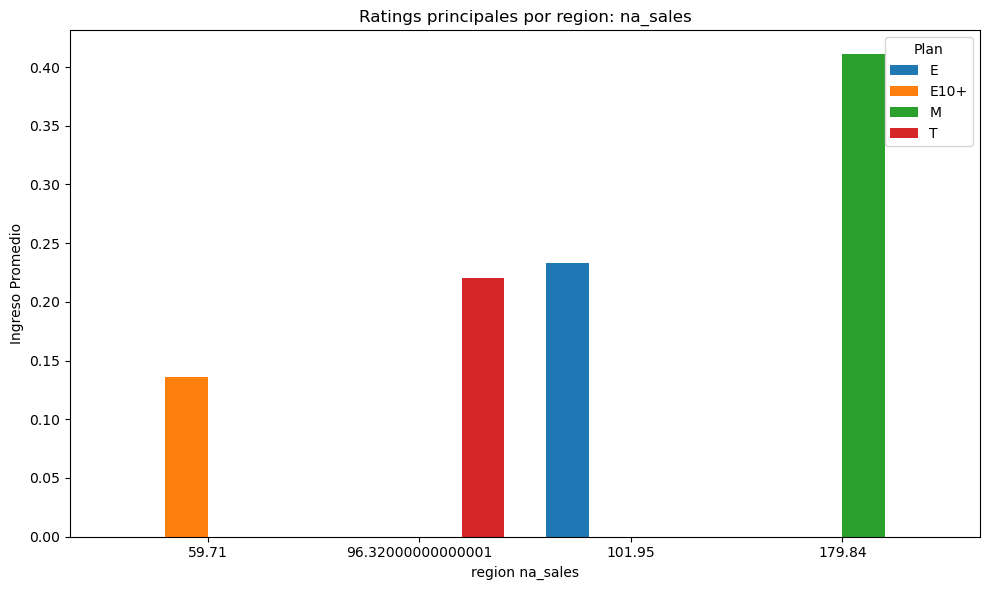

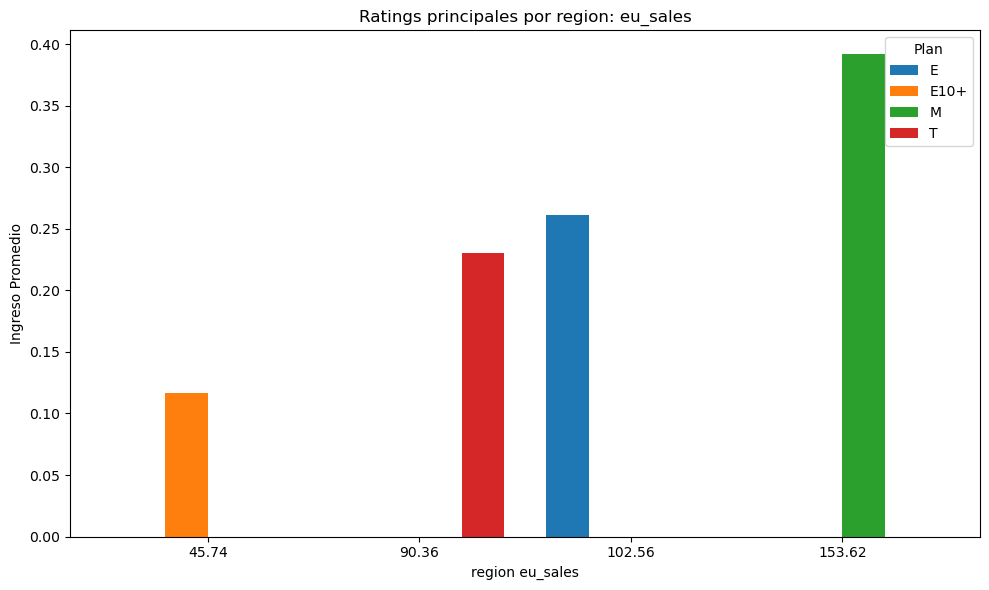

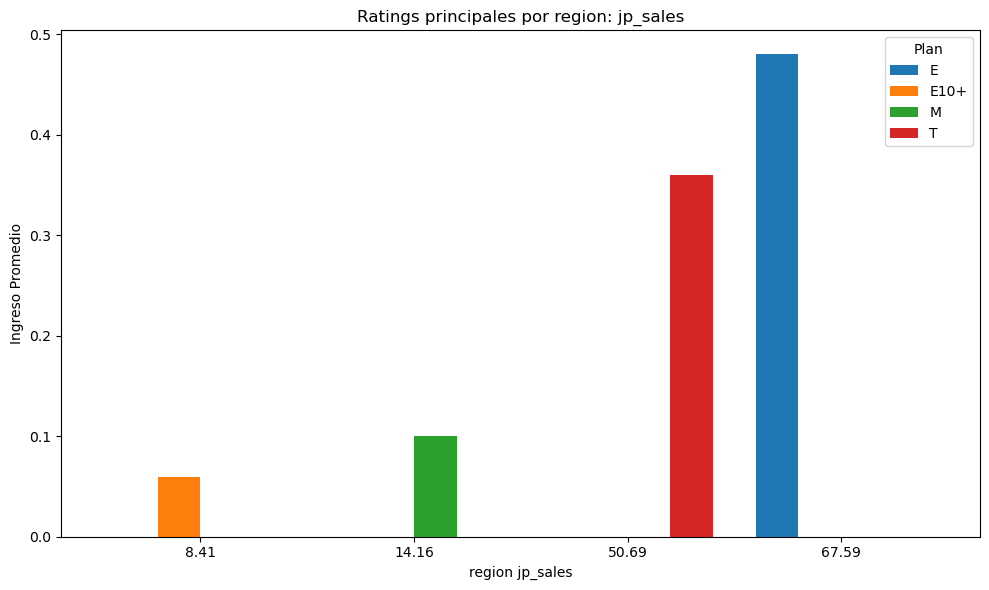

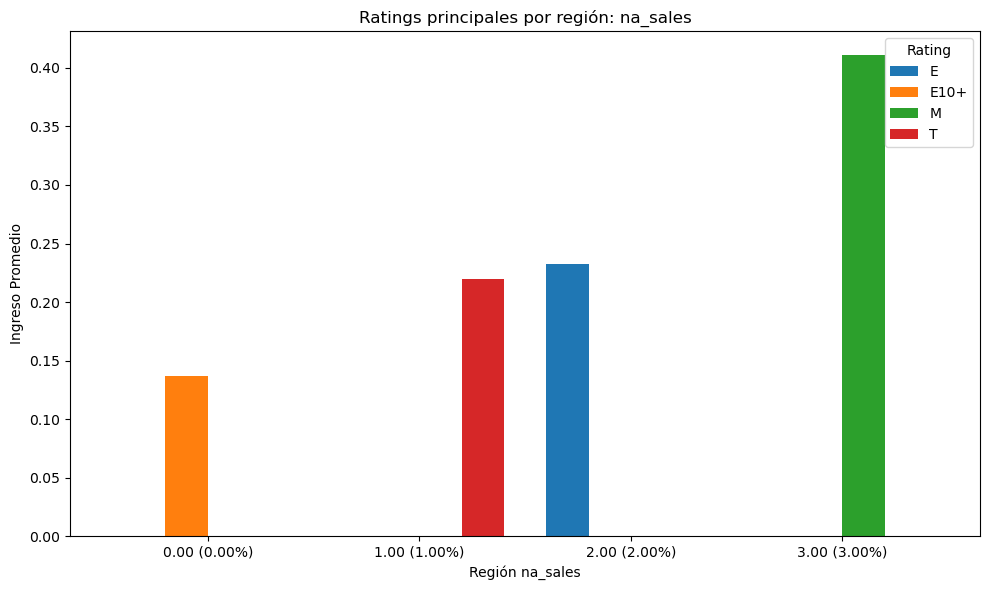

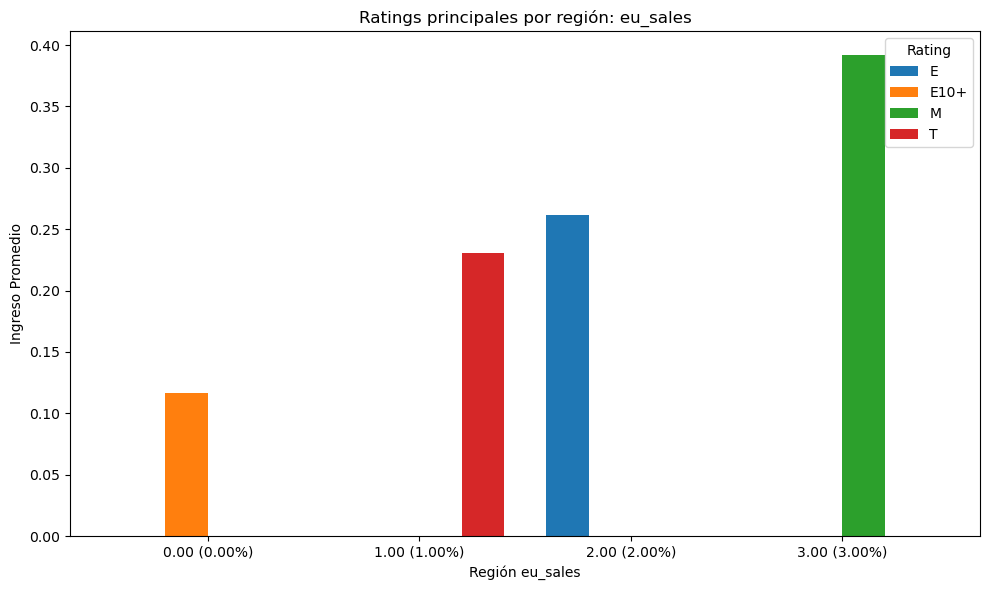

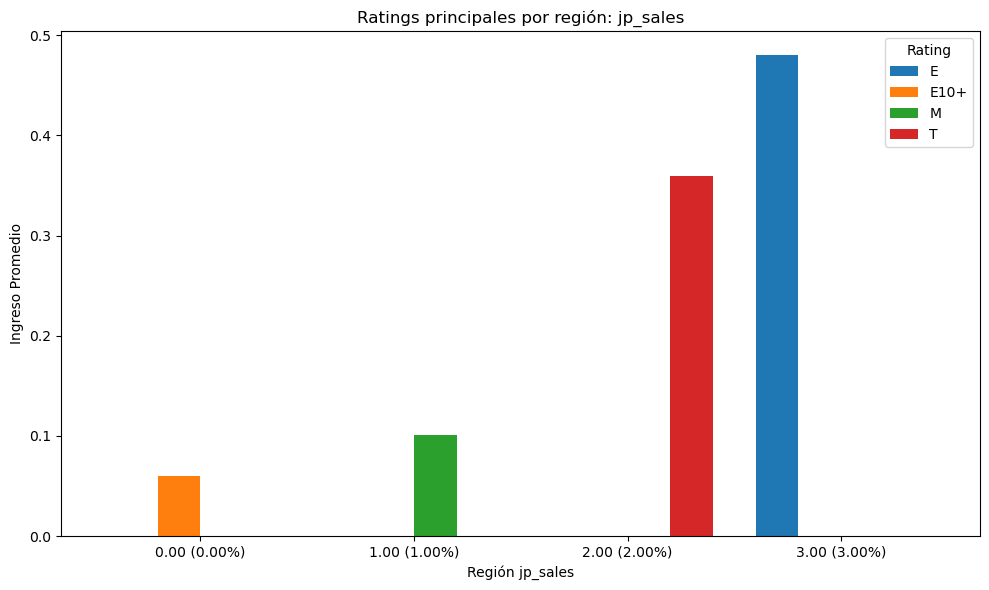

In [27]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    principal_platform = (
        data_game_play_studio
        .groupby('rating')[region]
        .sum()
        .reset_index()
      
    )

    principal_platform['average_sales'] = principal_platform[region] / principal_platform[region].sum()
    
    sales_by_principal_platform =(
        principal_platform
        .sort_values(by=region)
        .head(5)
    )
    
    pivot_table = sales_by_principal_platform.pivot(index=region,columns='rating',values='average_sales')
    ax= pivot_table.plot(kind='bar',figsize=(10,6),width=0.8)
    plt.title(f'Ratings principales por region: {region}')
    plt.xlabel(f'region {region}')
    plt.ylabel('Ingreso Promedio')
    plt.legend(title='Plan', loc='upper right')
    plt.xticks(rotation=0)
    
    
    plt.tight_layout()
    plt.show()  
   



En la región Na y Eu comparten el mayor rating en la posición M y la región jp el rating E

## **Comprobación de hipotesís**

Se comprueban las siguientes hipotesís:

**— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

**— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

Por estandár se elige alfa como 0.5 y el ttest por que a partir de esta prueba utilizada para comparar las medias de dos grupos y determinar si existen diferencias significativas entre ellos.


In [83]:
alpha = 0.5
#Hipotesis nula H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
#Hipotesis alternativa H1: Ambas muestras tienen una distribución normal.
puntuation_Xbox_one = data_game_play_studio.query('platform == "XOne"')['user_score']
puntuation_Pc = data_game_play_studio.query('platform == "PC"')['user_score']
#Hipotesis nula H0: Las calificaciones promedio de los usuarios para los generos de accion y deporte son diferentes.
#Hipotesis alternativa H1: Las calificaciones promedio de los usuarios para los generos de accion y deporte son  normales.
puntuation_genre_action = data_game_play_studio.query('genre == "Action"')['user_score']
puntuation_genre_sports = data_game_play_studio.query('genre == "Sports"')['user_score']


t_stat,p_value = stats.ttest_ind(puntuation_Xbox_one,puntuation_Pc)
if p_value < alpha:
    print('Rechazamos la hipotesis nula : No hay confianza suficiente para determinar la igualdad de las medias')
else:
    print('No rechazamos la hipotesis nula: Las medias son iguales con un intervalo de confianza de 95')


t_stat,p_value = stats.ttest_ind(puntuation_genre_action,puntuation_genre_sports)
if p_value < alpha:
    print('Rechazamos la hipotesis nula :  Las calificaciones promedio de los usuarios para los géneros de accion y deporte son iguales')
else:
    print('No rechazamos la hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de accion y deporte son diferentes.')


No rechazamos la hipotesis nula: Las medias son iguales con un intervalo de confianza de 95
No rechazamos la hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de accion y deporte son diferentes.


## **Conclusión general**


### 1.- Preparar los datos
Se creo la imputación de datos a partir de los datos que tenían completos sus filas, empezando con las columnas que tenían menos datos nulos a los que estaban a más de la mitad con dichos datos.

La decisión que se tomó para rellenarnos consiste en que más de la mitad de los datos tenían defectos , los cuales podían potencialmente dañinos para un análisis acertado.


### 2.- Analizar los datos

El análisis consistió en poder visualizar de forma acertada los conceptos que más iportaban para una posible propuesta publicitaría como lo es el año, las ventas totales, y la tendencia de lass plataformas, mismas que intervinieron en el proceso de selección de las posibles plataformas con mayor relevancia en datos en comparativa con las ventas, creando un top 5 de plataformas con presencía estable hasta el año 2016.

Se estimó el tiempo promedio de la duración de las plataformas con mayor éxito y el surgimiento de nuevas plataformas, este tiempo se tomo en cuenta para calcular y definir el periodo de tiempo a utilizar para estudiar los datos, eligiendo el año 2014, se comprueban que plataformas tienen presencia en el 2014 para el 2016 para las siguientes visualizaciones.

Se crea visualizaciones para determinar el impacto del rating y el user score , con el fin de observar las posibles correlaciones, demostrando que ciertamente hay una tendencia negativa etre la variable de venta y score de usuario.

Se crean los boxplots para observar el ordenamiento de los datos de forma general, así como su tendencia negativa o positiva y la media a través de los datos.

Se analizan los juegos multiplataforma y cuales son los que tienen mas presencia y se calcula y gráfica los géneros de juegos con mayores ventas.

### 3.- Crear perfil de usuario cada región

De acuerdo a las visualizaciones anteriores se crea por región un acercamiento para observar tendencias en regiones , determinando que el Wii U es una plataforma popular en las tres regiones, pero que en contraparte con la estadistica de las ventas no se tiene el mismo valor, dado a que, existen otras ventas en otros sitios, pero que si se tratará de una publicidad selectiva pudiera triunfar en las tres regiones localizadas.

Así mismo, la visualización derivo que el género de plataforma es líder en todas las regiones identificadas ocupando el octavo lugar en las ventas mundiales.


### 4.- Hipotesís

Las hipotesis planteadas son ambas verdaderas , dado a que se estudiarón a través del ttest_ind que determina la media a través de dos grupos de datos diferentes y los compara, mismo que es adecuado para el estudio.


